In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statistics import mean
import matplotlib.pyplot as plt

import pandas as pd
from os.path import exists
import warnings
from datetime import date
import math

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train = train.drop('Unnamed: 0', axis=1)
test = test.drop('Unnamed: 0', axis=1)

In [4]:
def date_to_int(d):
    initial_date = date(2020, 1, 21)
    curr_date = [int(x) for x in d.split('-')]
    final_date = date(curr_date[0], curr_date[1], curr_date[2])
    delta = final_date - initial_date
    return delta.days

In [5]:
one_hot_train = pd.get_dummies(train['Country'])
train = train.join(one_hot_train)
train['Day'] = train['Date'].apply(lambda x: date_to_int(x))

In [6]:
one_hot_test = pd.get_dummies(test['Country'])
test = test.join(one_hot_train)
test['Day'] = test['Date'].apply(lambda x: date_to_int(x))

In [7]:
train['log_Confirmed'] = train['Confirmed'].apply(lambda x: round(math.log(x+1),3))
train['log_Deaths'] = train['Deaths'].apply(lambda x: round(math.log(x+1),3))
train['log_Recovered'] = train['Recovered'].apply(lambda x: round(math.log(x+1),3))
train['log_Active'] = train['Active'].apply(lambda x: round(math.log(x+1),3))

In [8]:
test['log_Confirmed'] = test['Confirmed'].apply(lambda x: round(math.log(x+1),3))
test['log_Deaths'] = test['Deaths'].apply(lambda x: round(math.log(x+1),3))
test['log_Recovered'] = test['Recovered'].apply(lambda x: round(math.log(x+1),3))
test['log_Active'] = test['Active'].apply(lambda x: round(math.log(x+1),3))

In [11]:
train.drop(train.iloc[:, 0:6], inplace = True, axis = 1)
test.drop(test.iloc[:, 0:6], inplace = True, axis = 1)

In [32]:
# Grabbing x/y train test sets for 'Confirmed' cases
confirmed_train_x = train.drop(train.columns[[-1,-2,-3,-4]], axis = 1)
confirmed_train_y = train['log_Confirmed']

confirmed_test_x = test.drop(test.columns[[-1,-2,-3,-4]], axis = 1)
confirmed_test_y = test['log_Confirmed']

# Performing 5-fold cross validation on rolling basis for 'Confirmed' RF model
all_train = confirmed_train_x.append(confirmed_test_x).to_numpy()
all_values = confirmed_train_y.append(confirmed_test_y).to_numpy()

tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []
rmsle_scores = []

for train_index, test_index in tscv.split(all_train):
    x_train, x_test = all_train[train_index], all_train[test_index]
    y_train, y_test = all_values[train_index], all_values[test_index]
    
    DTR=DecisionTreeRegressor(max_depth=4)
    booster=AdaBoostRegressor(n_estimators=60, base_estimator=DTR ,learning_rate=0.5)
    booster.fit(x_train, y_train)
    predict = booster.predict(x_test)
    rmse_scores.append(round(mean_squared_error(y_test, predict),3))
    rmsle_scores.append(round(mean_squared_log_error(y_test, predict),3))

print('Now predicting Confirmed Cases...')
print('Cross validated root mean squared errors are:', rmse_scores)
print('Average RMSE using RF to predict Confirmed cases is:', mean(rmse_scores))
print()
print('Cross validated root mean squared log errors are:', rmsle_scores)
print('Average RMSLE using RF to predict Confirmed cases is:', mean(rmsle_scores))

Now predicting Confirmed Cases...
Cross validated root mean squared errors are: [0.984, 2.251, 5.935, 8.936, 8.595]
Average RMSE using RF to predict Confirmed cases is: 5.3402

Cross validated root mean squared log errors are: [0.388, 0.527, 0.634, 0.342, 0.231]
Average RMSLE using RF to predict Confirmed cases is: 0.4244


Text(0, 0.5, '$\\hat{y}$')

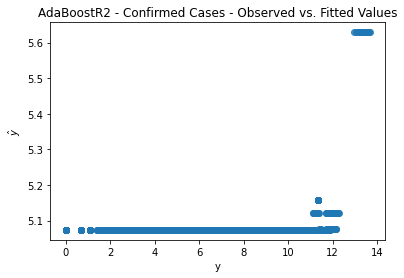

In [27]:
# Plots the observed values, y, against the fittted values, y hat
df_pred = pd.DataFrame(list(y_test), columns = ['y_test'])
df_pred['predict'] = list(predict)

plt.scatter(df_pred['y_test'], df_pred['predict'], alpha = 0.8)
plt.title('AdaBoostR2 - Confirmed Cases - Observed vs. Fitted Values')
plt.xlabel('y')
plt.ylabel('$\hat{y}$')

In [33]:
# Grabbing x/y train test sets for 'Deaths' cases
deaths_train_x = train.drop(train.columns[[-1,-2,-3,-4]], axis = 1)
deaths_train_y = train['log_Deaths']

deaths_test_x = test.drop(test.columns[[-1,-2,-3,-4]], axis = 1)
deaths_test_y = test['log_Deaths']

# Performing 5-fold cross validation on rolling basis for 'Deaths' RF model
all_train = deaths_train_x.append(deaths_test_x).to_numpy()
all_values = deaths_train_y.append(deaths_test_y).to_numpy()

tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []
rmsle_scores = []

for train_index, test_index in tscv.split(all_train):
    x_train, x_test = all_train[train_index], all_train[test_index]
    y_train, y_test = all_values[train_index], all_values[test_index]
    DTR=DecisionTreeRegressor(max_depth=4)
    booster=AdaBoostRegressor(n_estimators=60, base_estimator=DTR ,learning_rate=0.5)
    booster.fit(x_train, y_train)
    predict = booster.predict(x_test)
    rmse_scores.append(round(mean_squared_error(y_test, predict),3))
    rmsle_scores.append(round(mean_squared_log_error(y_test, predict),3))

print('Now predicting Deaths Cases...')
print('Cross validated root mean squared errors are:', rmse_scores)
print('Average RMSE using RF to predict Deaths cases is:', mean(rmse_scores))
print()
print('Cross validated root mean squared log errors are:', rmsle_scores)
print('Average RMSLE using RF to predict Deaths cases is:', mean(rmsle_scores))

Now predicting Deaths Cases...
Cross validated root mean squared errors are: [0.012, 0.239, 1.397, 3.853, 5.836]
Average RMSE using RF to predict Deaths cases is: 2.2674000000000003

Cross validated root mean squared log errors are: [0.004, 0.085, 0.41, 0.606, 0.575]
Average RMSLE using RF to predict Deaths cases is: 0.33599999999999997


In [34]:
# Grabbing x/y train test sets for 'Recovered' cases
recovered_train_x = train.drop(train.columns[[-1,-2,-3,-4]], axis = 1)
recovered_train_y = train['log_Recovered']

recovered_test_x = test.drop(test.columns[[-1,-2,-3,-4]], axis = 1)
recovered_test_y = test['log_Recovered']

# Performing 5-fold cross validation on rolling basis for 'Recovered' RF model
all_train = recovered_train_x.append(recovered_test_x).to_numpy()
all_values = recovered_train_y.append(recovered_test_y).to_numpy()

tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []
rmsle_scores = []

for train_index, test_index in tscv.split(all_train):
    x_train, x_test = all_train[train_index], all_train[test_index]
    y_train, y_test = all_values[train_index], all_values[test_index]
    
    DTR=DecisionTreeRegressor(max_depth=4)
    booster=AdaBoostRegressor(n_estimators=60, base_estimator=DTR ,learning_rate=0.5)
    booster.fit(x_train, y_train)
    predict = booster.predict(x_test)
    rmse_scores.append(round(mean_squared_error(y_test, predict),3))
    rmsle_scores.append(round(mean_squared_log_error(y_test, predict),3))

print('Now predicting Recovered Cases...')
print('Cross validated root mean squared errors are:', rmse_scores)
print('Average RMSE using RF to predict Recovered cases is:', mean(rmse_scores))
print()
print('Cross validated root mean squared log errors are:', rmsle_scores)
print('Average RMSLE using RF to predict Recovered cases is:', mean(rmsle_scores))

Now predicting Recovered Cases...
Cross validated root mean squared errors are: [0.194, 0.845, 2.115, 5.043, 7.93]
Average RMSE using RF to predict Recovered cases is: 3.2254

Cross validated root mean squared log errors are: [0.051, 0.281, 0.566, 0.619, 0.492]
Average RMSLE using RF to predict Recovered cases is: 0.4018


In [35]:
# Grabbing x/y train test sets for 'Active' cases
active_train_x = train.drop(train.columns[[-1,-2,-3,-4]], axis = 1)
active_train_y = train['log_Active']

active_test_x = test.drop(test.columns[[-1,-2,-3,-4]], axis = 1)
active_test_y = test['log_Active']

# Performing 5-fold cross validation on rolling basis for 'Active' RF model
all_train = active_train_x.append(active_test_x).to_numpy()
all_values = active_train_y.append(active_test_y).to_numpy()

tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []

for train_index, test_index in tscv.split(all_train):
    x_train, x_test = all_train[train_index], all_train[test_index]
    y_train, y_test = all_values[train_index], all_values[test_index]
    
    DTR=DecisionTreeRegressor(max_depth=4)
    booster=AdaBoostRegressor(n_estimators=60, base_estimator=DTR ,learning_rate=0.5)
    booster.fit(x_train, y_train)
    predict = booster.predict(x_test)
    rmse_scores.append(round(mean_squared_error(y_test, predict),3))
    rmsle_scores.append(round(mean_squared_log_error(y_test, predict),3))


print('Now predicting Active Cases...')
print('Cross validated root mean squared errors are:', rmse_scores)
print('Average RMSE using RF to predict Active cases is:', round(mean(rmse_scores),4))
print()
print('Cross validated root mean squared log errors are:', rmsle_scores)
print('Average RMSLE using RF to predict Active cases is:', mean(rmsle_scores))

Now predicting Active Cases...
Cross validated root mean squared errors are: [0.822, 2.054, 5.872, 8.62, 8.097]
Average RMSE using RF to predict Active cases is: 5.093

Cross validated root mean squared log errors are: [0.051, 0.281, 0.566, 0.619, 0.492, 0.349, 0.49, 0.629, 0.348, 0.268]
Average RMSLE using RF to predict Active cases is: 0.4093
